In [1]:
import json
import os
import numpy as np
import datetime
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
# Plotlib magic
%matplotlib inline

In [96]:
"""Add sentiment scores"""
#Load the sentiment emoji data 
data_str1='Melkopname_ForsterCANBUS.abruf 3.tsv'
data_str2='Melkopname_ForsterCANBUS.soll 3.tsv'
#data_str3='DeHarne_Calendar20171115083854.csv'
water=pd.read_csv(data_str1,sep ="\t",header=-1 )
weight=pd.read_csv(data_str2,sep ="\t",header=-1 )
water.columns=['Time','tick']
weight.columns=['Time','weight']
#feed=pd.read_csv(data_str2, sep =";", decimal=",")
#calendar=pd.read_csv(data_str3, sep =";", decimal=",")

In [97]:
water

,Time,tick
0,2014-01-17T09:23:08.000,4.2
1,2014-01-17T10:24:16.000,4.2
2,2014-01-17T12:26:19.000,4.2
3,2014-01-17T13:27:29.000,4.2
4,2014-01-19T22:59:00.000,7.0
5,2014-01-20T13:32:45.000,2.8
6,2014-01-20T13:42:57.000,5.6
7,2014-01-20T19:39:14.000,5.8
8,2014-01-20T19:49:24.000,7.0
9,2014-01-20T21:41:11.000,7.0


In [98]:
water.ts = pd.to_datetime(water.Time, unit='ms')
water.rename(columns={'Time':'ts'}, inplace=True)
f= lambda y: y.date()

water['date']= water.ts.map(f)

weight.ts = pd.to_datetime(weight.Time, unit='ms')
weight.rename(columns={'Time':'ts'}, inplace=True)


weight['date']= weight.ts.map(f)

In [99]:
weight

,ts,weight,date
0,2014-01-17T09:23:08.000,7.0,2014-01-17
1,2014-01-17T10:24:16.000,7.0,2014-01-17
2,2014-01-17T12:26:19.000,7.0,2014-01-17
3,2014-01-17T13:27:29.000,7.0,2014-01-17
4,2014-01-19T22:59:00.000,7.0,2014-01-19
5,2014-01-20T13:32:45.000,7.0,2014-01-20
6,2014-01-20T13:42:57.000,7.0,2014-01-20
7,2014-01-20T19:39:14.000,7.0,2014-01-20
8,2014-01-20T19:49:24.000,7.0,2014-01-20
9,2014-01-20T21:41:11.000,7.0,2014-01-20


In [100]:
water_copy=water[['date','tick']]
water_per_day=water_copy.groupby(['date']).agg(['sum']).reset_index()
water_per_day.columns=['date','tick']

In [101]:
weight_copy=weight[['date','weight']]
weight_per_day=weight_copy.groupby(['date']).agg(['sum']).reset_index()
weight_per_day.columns=['date','weight']


In [92]:
weight_per_day

,date,weight
0,2014-01-16,40.5
1,2014-01-17,12.5
2,2014-01-19,0.0
3,2014-01-20,0.0
4,2014-01-21,0.0
5,2014-01-22,0.0
6,2014-01-23,0.0
7,2014-01-24,0.0
8,2014-01-25,0.0
9,2014-01-26,0.0


In [102]:
water_day=water_per_day.set_index('date')
weight_day=weight_per_day.set_index('date')
df_outer_join=pd.merge(water_day, weight_day, how='inner', left_index=True, right_index=True).reset_index()


In [94]:
df_outer_join

,date,tick,weight
0,2014-01-16,7.5,40.5
1,2014-01-17,0.0,12.5
2,2014-01-19,0.0,0.0
3,2014-01-20,0.0,0.0
4,2014-01-21,0.0,0.0
5,2014-01-22,0.0,0.0
6,2014-01-23,0.0,0.0
7,2014-01-24,0.0,0.0
8,2014-01-25,0.0,0.0
9,2014-01-26,0.0,0.0


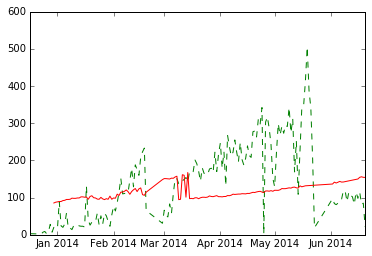

In [54]:
plt.figure(1)                # the first figure
fig, ax = plt.subplots()            # the first subplot in the first figure
#ax=plt.subplot(211)
ax.plot(water_day.tick, 'g--', label='data')
ax.plot(weight_day.weight, 'r-', label='estimated mean')

In [59]:
water_day.reset_index()

,date,tick
0,2013-12-17,3
1,2013-12-23,2
2,2013-12-24,7
3,2013-12-25,9
4,2013-12-26,3
5,2013-12-27,8
6,2013-12-28,28
7,2013-12-29,7
8,2013-12-30,20
9,2013-12-31,16


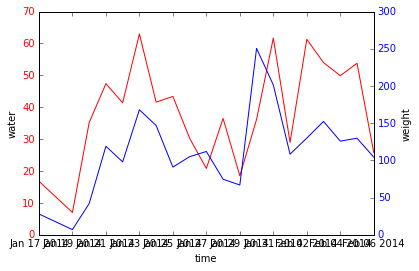

In [103]:
import numpy as np
import matplotlib.pyplot as plt


def two_scales(ax1, time, data1, data2, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time')
    ax1.set_ylabel('water')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('weight')
    return ax1, ax2


# Create some mock data
t = df_outer_join.date
s1 = df_outer_join.tick
s2 = df_outer_join.weight

# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, t, s1, s2, 'r', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.show()

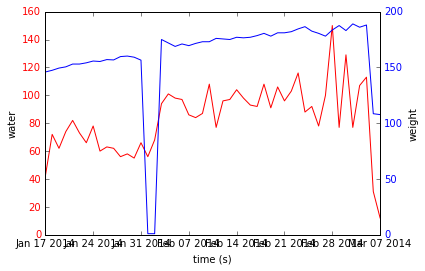

In [68]:
import numpy as np
import matplotlib.pyplot as plt


def two_scales(ax1, time, data1, data2, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('water')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('weight')
    return ax1, ax2


# Create some mock data
t = df_outer_join.date
s1 = df_outer_join.tick
s2 = df_outer_join.weight

# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, t, s1, s2, 'r', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.show()

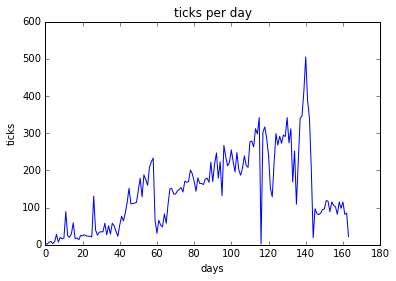

In [38]:
Y=water_per_day.tick
plt.xlabel('days')
plt.ylabel('ticks')
#ax.set_yticks([])
#fig.savefig("histogram2.png", dpi=25)  # results in 160x120 px image
plt.title("ticks per day");
plt.plot(Y)
plt.savefig("time_series_of_ticks_per_day.png", dpi=105)

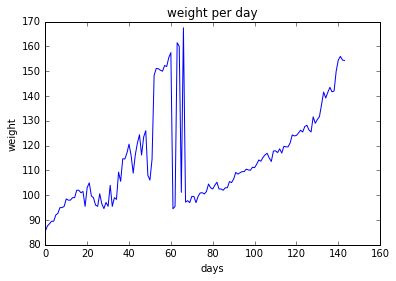

In [46]:
Y=weight_per_day.weight
plt.xlabel('days')
plt.ylabel('weight')
#ax.set_yticks([])
#fig.savefig("histogram2.png", dpi=25)  # results in 160x120 px image
plt.title("weight per day");
plt.plot(Y)
plt.savefig("time_series_of_weight_per_day.png", dpi=105)

In [153]:
cows=pd.read_csv('cow_features (1).csv')

In [154]:
cows.columns

Index(['animal_number', ' wd60', ' wd120', ' avg_milkintake', ' max_milk_day',
       ' bv_kgMilkn', ' total_kgMilk_305d', ' total_kgFat_305d',
       ' total_kgProtein_305d'],
      dtype='object')

In [200]:
cows[' wd120 sq']=cows[' wd120']**2
cows[' wd60 sq']=cows[' wd60']**2
cows[' wd120 ln']=np.log(cows[' wd120'])
cows[' wd60 ln']=np.log(cows[' wd60'])
cows[' total_kgMilk_305d ln']= np.log(cows[' total_kgMilk_305d'])
cows[' avg_milkintake ln']= np.log(cows[' avg_milkintake'])
cows[' avg_milkintake sq']=cows[' avg_milkintake']**2

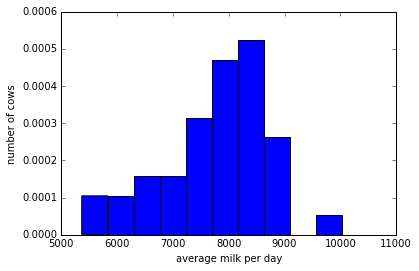

In [205]:

X = cows[' total_kgMilk_305d'].values
fig, ax = plt.subplots()
ax.hist(X, normed=True) # Normed = True -> Makes sure the integral is 1
#ax.set_xticks(range(1, 17))
#plt.ylim((0, 710));
ax.relim()
#ax.set_ylim(0, 1010)
#plt.ylim((0, 12310));
plt.xlabel('average milk per day')
plt.ylabel('number of cows')
#ax.set_yticks([])
fig.savefig("hist_average milk production across cows.png", dpi=105)  # results in 160x120 px image

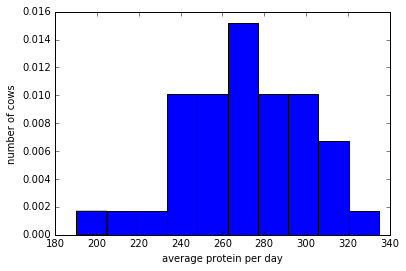

In [208]:

X = cows[' total_kgProtein_305d'].values
fig, ax = plt.subplots()
ax.hist(X, normed=True) # Normed = True -> Makes sure the integral is 1
#ax.set_xticks(range(1, 17))
#plt.ylim((0, 710));
ax.relim()
#ax.set_ylim(0, 1010)
#plt.ylim((0, 12310));
plt.xlabel('average protein per day')
plt.ylabel('number of cows')
#ax.set_yticks([])
fig.savefig("hist_average protein production across cows.png", dpi=105)  # results in 160x120 px image

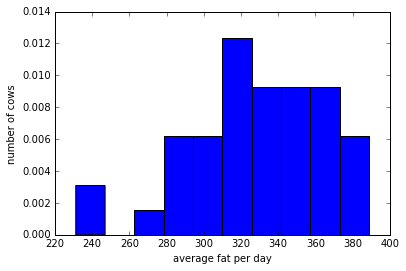

In [209]:

X = cows[' total_kgFat_305d'].values
fig, ax = plt.subplots()
ax.hist(X, normed=True) # Normed = True -> Makes sure the integral is 1
#ax.set_xticks(range(1, 17))
#plt.ylim((0, 710));
ax.relim()
#ax.set_ylim(0, 1010)
#plt.ylim((0, 12310));
plt.xlabel('average fat per day')
plt.ylabel('number of cows')
#ax.set_yticks([])
fig.savefig("hist_average fat production across cows.png", dpi=105)  # results in 160x120 px image

In [187]:
import statsmodels.api as sm
y = cows[' total_kgMilk_305d']# response

X = cows[[' wd120 sq',' wd120',' bv_kgMilkn']] # predictor
#X = cows[[' avg_milkintake',' bv_kgMilkn']] # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
#X.head()
est = sm.OLS(y, X)

In [188]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_kgMilk_305d   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     14.76
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.78e-06
Time:                        09:10:51   Log-Likelihood:                -324.37
No. Observations:                  41   AIC:                             656.7
Df Residuals:                      37   BIC:                             663.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         779.2583   2596.544      0.300      0.766     -4481.839  6040.355
 wd120 sq      -0.4828      0.218     -2.212      0.033        -0.925    -0.041
 wd120        114.1904     47.515      2.403      0.021        17.915   210.466
 bv_kgMilkn     1.3243      0.227      5.845      0.000         0.865     1.783
==============================================================================
Omnibus:                        0.349   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.840   Jarque-Bera (JB):                0.393
Skew:                          -0.200   Prob(JB):                        0.822
Kurtosis:                       2.737   Cond. No.                     3.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
import statsmodels.api as sm
y = cows[' total_kgMilk_305d']# response

#y= y[0:38]
X = cows[[' wd60',' wd120', ' avg_milkintake', ' bv_kgMilkn']] # predictor

#X =X[0:38]
#X = cows[[' avg_milkintake',' bv_kgMilkn']] # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
#X.head()
est2 = sm.OLS(y, X)

In [246]:
est2 = est2.fit()
est2.summary()
#ypred2 = est2.predict(X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_kgMilk_305d   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     10.87
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           7.00e-06
Time:                        11:11:50   Log-Likelihood:                -324.26
No. Observations:                  41   AIC:                             658.5
Df Residuals:                      36   BIC:                             667.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const            6603.5874   1430.358      4.617      0.000      3702.687  9504.488
 wd60             -30.4550     18.939     -1.608      0.117       -68.866     7.956
 wd120             17.6736      8.358      2.115      0.041         0.723    34.624
 avg_milkintake    10.5646      6.617      1.597      0.119        -2.856    23.985
 bv_kgMilkn         1.3195      0.233      5.666      0.000         0.847     1.792
==============================================================================
Omnibus:                        0.186   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.020
Skew:                          -0.052   Prob(JB):                        0.990
Kurtosis:                       2.966   Cond. No.                     7.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
ypred2 = est2.predict(X)

In [234]:
X[0:1]

,const,wd60,wd120,avg_milkintake,bv_kgMilkn
0,1,76.940666,127.036639,85.12439,849


In [235]:
y[0:1]

0    9014
Name:  total_kgMilk_305d, dtype: float64

In [236]:
ypred2[0:1]

array([ 8525.09087423])

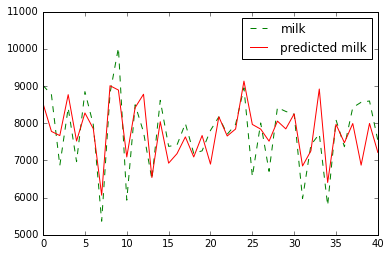

In [251]:
plt.figure(1)                # the first figure
fig, ax = plt.subplots()            # the first subplot in the first figure
#ax=plt.subplot(211)
ax.plot(y, 'g--', label='milk')
ax.plot(ypred2, 'r-', label='predicted milk')
plt.legend()
plt.savefig("milk_prediction.png", dpi=305)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, 'o', label="Data")
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

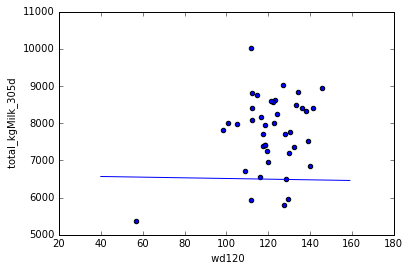

In [225]:
import statsmodels.api as sm

# regress "expression" onto "motifScore" (plus an intercept)
model = sm.OLS(cows[' total_kgMilk_305d'], sm.add_constant(cows[[' wd60',' wd120', ' avg_milkintake', ' bv_kgMilkn']]))
p = model.fit().params

#print(p.FeedIntake)
# generate x-values for your regression line (two is sufficient)
x1 = np.arange(40, 160)
x2 = np.arange(40, 160)
x3 = np.arange(40, 160)
x4 = np.arange(40, 160)
# scatter-plot data
ax = cows.plot(x=' wd120', y=' total_kgMilk_305d', kind='scatter')

# plot regression line on the same axes, set x-axis limits
ax.plot(x1, p.const + p[' wd60'] * x1 + p[' wd120'] * x2+ p[' avg_milkintake'] * x3 + p[' bv_kgMilkn']* x4)
#ax.set_xlim([1, 2])

In [203]:
y = cows[' total_kgFat_305d']# response

X = cows[[ ' avg_milkintake', ' bv_kgMilkn']] # predictor
#X = cows[[' avg_milkintake',' bv_kgMilkn']] # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
#X.head()
est3 = sm.OLS(y, X)

In [204]:
est3 = est3.fit()
est3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_kgFat_305d   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     6.048
Date:                Fri, 01 Dec 2017   Prob (F-statistic):            0.00524
Time:                        09:29:25   Log-Likelihood:                -200.36
No. Observations:                  41   AIC:                             406.7
Df Residuals:                      38   BIC:                             411.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             274.3413     25.573     10.728      0.000       222.572   326.111
 avg_milkintake     0.5918      0.311      1.905      0.064        -0.037     1.221
 bv_kgMilkn         0.0293      0.011      2.746      0.009         0.008     0.051
==============================================================================
Omnibus:                        2.216   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.210
Skew:                          -0.232   Prob(JB):                        0.546
Kurtosis:                       3.701   Cond. No.                     2.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
y = cows[' total_kgProtein_305d']# response

X = cows[[' wd60',' wd120', ' bv_kgMilkn']] # predictor
#X = cows[[' avg_milkintake',' bv_kgMilkn']] # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
#X.head()
est4= sm.OLS(y, X)

In [198]:
est4 = est4.fit()
est4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:      total_kgProtein_305d   R-squared:                       0.487
Model:                               OLS   Adj. R-squared:                  0.446
Method:                    Least Squares   F-statistic:                     11.72
Date:                   Fri, 01 Dec 2017   Prob (F-statistic):           1.53e-05
Time:                           09:21:51   Log-Likelihood:                -182.21
No. Observations:                     41   AIC:                             372.4
Df Residuals:                         37   BIC:                             379.3
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         285.3877     39.746      7.180      0.000       204.854   365.921
 wd60          -1.2537      0.584     -2.147      0.038        -2.437    -0.070
 wd120          0.5455      0.255      2.135      0.039         0.028     1.063
 bv_kgMilkn     0.0378      0.007      5.283      0.000         0.023     0.052
==============================================================================
Omnibus:                        1.819   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.179
Skew:                           0.075   Prob(JB):                        0.555
Kurtosis:                       2.183   Cond. No.                     6.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

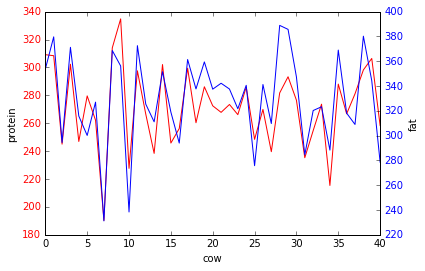

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def two_scales(ax1, time, data1, data2, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('cow')
    ax1.set_ylabel('protein')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('fat')
    return ax1, ax2


# Create some mock data
t = cows.index
s1 = cows[' total_kgProtein_305d']
s2 = cows[' total_kgFat_305d']

# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, t, s1, s2, 'r', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.show()